# Comparaison sans bruit
On souhaite tester la sensibilité de la reconstruction au noyau.

In [1]:
# General import
import numpy as np
import sys
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.alternate import AlternatingBD
from Codes.algoviolet import violetBD
from Codes.dataprocess import DataGen
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex

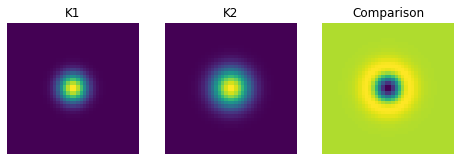

Erreur |K1 - K2|/ |K2| : 0.3500 


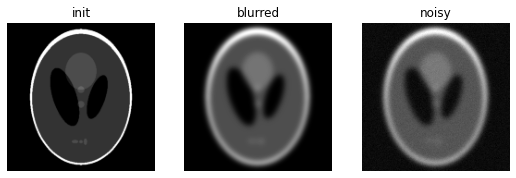

Erreur blurred |x_blurr- x_true|_2 :0.5093
Erreur |x_noisy - x_true|_2 :0.5108


In [2]:
K, K_shift, x_im, x_b, x_o1 = DataGen()

In [3]:
alpha = 100
mu    = 0.001
K_in  = K_shift.copy()
x_in  = x_b
#
sys.stdout.flush() # supprimer les sorties print
# Altrn
K_out12,x_out12,Ep12,Ed12 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=1500,\
                  proj_simplex=True,verbose=False)
# PDA
K_out22,x_out22,Ep22,Ed22 = violetBD(K_in,x_in,x_b,alpha,mu,\
                            niter=3000,\
                            proj_simplex=True,verbose=False)

Final energy : 2.3993273270137694
Final energy : 1.1785517151560168


In [5]:
# PDA
K_in = K_out22.copy()
gamma=100
K_out22bis,x_out22bis,Ep22bis,Ed22bis = violetBD(K_in,x_in,x_b,alpha,mu,\
                            niter=3000,\
                            proj_simplex=True)

iteration 60 %--- gradient K 952.8918 --- gradient x 1.0570
iteration 120 %--- gradient K 760.1489 --- gradient x 0.7490
iteration 180 %--- gradient K 609.9344 --- gradient x 0.5850
iteration 240 %--- gradient K 502.8171 --- gradient x 0.4777
iteration 300 %--- gradient K 424.5161 --- gradient x 0.4023
iteration 360 %--- gradient K 365.0351 --- gradient x 0.3466
iteration 420 %--- gradient K 320.9830 --- gradient x 0.3053
iteration 480 %--- gradient K 285.2130 --- gradient x 0.2724
iteration 540 %--- gradient K 255.5629 --- gradient x 0.2458
iteration 600 %--- gradient K 231.4689 --- gradient x 0.2239
iteration 660 %--- gradient K 211.6319 --- gradient x 0.2062
iteration 720 %--- gradient K 195.1927 --- gradient x 0.1914
iteration 780 %--- gradient K 181.7829 --- gradient x 0.1791
iteration 840 %--- gradient K 170.7443 --- gradient x 0.1702
iteration 900 %--- gradient K 161.4146 --- gradient x 0.1626
iteration 960 %--- gradient K 153.9511 --- gradient x 0.1559
iteration 1020 %--- gradi

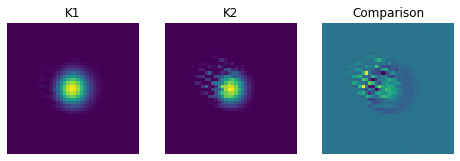

Erreur |K1 - K2|/ |K2| : 0.2321 


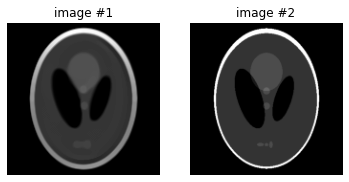

Erreur |im1 - im2|/|im2| :0.3493


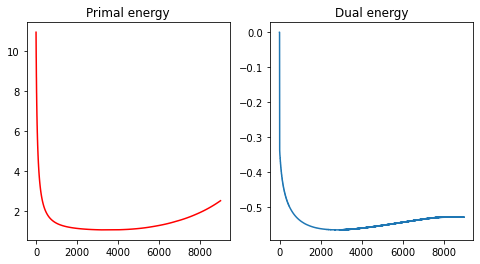

In [6]:
Display_ker(K_out22bis,K_in,mysize=(8,4))
Display_im(x_out22bis,x_im,mysize=(6,3))
Display_epd(Ep22bis,Ed22bis)